<a href="https://colab.research.google.com/github/dmc-mcc/DSI/blob/main/updated_stocksmodeling_Phase_3%264.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Phase 3 is Predictive Modeling

1. Define Nifty_Dir_Open =1/0 based on direction (dependent variable)

(already derived in phase 2)

2. Create data partition into train and test data sets (80/20)

3. Run Binary Logistic Regression with Nifty Direction as dependent variable and previous day global market returns (and VIX) as independent variables. You may add more features such as previous day High/Low ratio for Nifty 50 and/or DJI

4. Check multicollinearity and resolve if present

5. Check which variables are significant (revise the model if needed)

6. Obtain ROC curve and AUC for train data

7. Obtain threshold to balance sensitivity and specificity

Go to step 8 only if you are satisfied with model on train data

8.Obtain ROC curve and AUC for test data (compare with step 6)

9.Use above threshold to obtain sensitivity and specificity for test data

(compare with step 7)

10. Finalize the mode

In [ ]:
import pandas as pd
import numpy as np


df = pd.read_csv("masterdata.csv")
df

,Date,dow_Open,dow_High,dow_Low,dow_Close,dow_AdjClose,dow_Volume,dow_return,nasdaq_Open,nasdaq_High,...,wheat_Open,wheat_High,wheat_Low,wheat_Close,wheat_AdjClose,wheat_Volume,wheat_return,month,quarter,year
0,2018-01-02,24850.449219,24941.919922,24825.550781,24922.679688,24922.679688,456790000.0,0.397478,7017.069824,7069.149902,...,435.25,437.00,432.00,436.00,436.00,70970.0,0.576701,1.0,1.0,2018.0
1,2018-01-03,24850.449219,24941.919922,24825.550781,24922.679688,24922.679688,456790000.0,0.397478,7017.069824,7069.149902,...,435.25,437.00,432.00,436.00,436.00,70970.0,0.576701,1.0,1.0,2018.0
2,2018-01-04,24964.859375,25105.960938,24963.269531,25075.130859,25075.130859,403280000.0,0.611697,7089.500000,7098.049805,...,435.75,436.00,431.00,434.00,434.00,58728.0,-0.458716,1.0,1.0,2018.0
3,2018-01-05,25114.919922,25299.789062,25112.009766,25295.869141,25295.869141,358020000.0,0.880308,7105.740234,7137.040039,...,433.00,433.75,427.50,430.75,430.75,62551.0,-0.748848,1.0,1.0,2018.0
4,2018-01-08,25308.400391,25311.990234,25235.410156,25283.000000,25283.000000,341390000.0,-0.050874,7135.379883,7161.350098,...,430.25,432.25,425.75,427.75,427.75,71822.0,-0.696460,1.0,1.0,2018.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1559,2023-12-25,37405.898438,37617.988281,37371.828125,37545.328125,37545.328125,212420000.0,0.426255,15028.690430,15101.179688,...,615.00,639.75,611.50,636.25,636.25,40674.0,3.245436,12.0,4.0,2023.0
1560,2023-12-26,37405.898438,37617.988281,37371.828125,37545.328125,37545.328125,212420000.0,0.426255,15028.690430,15101.179688,...,615.00,639.75,611.50,636.25,636.25,40674.0,3.245436,12.0,4.0,2023.0
1561,2023-12-27,37518.621094,37683.699219,37488.601562,37656.519531,37656.519531,245530000.0,0.296152,15089.660156,15114.080078,...,636.00,637.50,619.25,623.00,623.00,38063.0,-2.082515,12.0,4.0,2023.0
1562,2023-12-28,37661.519531,37778.851562,37650.980469,37710.101562,37710.101562,199550000.0,0.142292,15142.089844,15150.070312,...,624.25,636.25,621.75,631.50,631.50,32254.0,1.364366,12.0,4.0,2023.0


# **PHASE 3**

In [ ]:
# Print column names as a list
print(list(df.columns))


['Date', 'dow_Open', 'dow_High', 'dow_Low', 'dow_Close', 'dow_AdjClose', 'dow_Volume', 'dow_return', 'nasdaq_Open', 'nasdaq_High', 'nasdaq_Low', 'nasdaq_Close', 'nasdaq_AdjClose', 'nasdaq_Volume', 'nasdaq_return', 'nifty_Open', 'nifty_High', 'nifty_Low', 'nifty_Close', 'nifty_AdjClose', 'nifty_Volume', 'nifty_return', 'dax_Open', 'dax_High', 'dax_Low', 'dax_Close', 'dax_AdjClose', 'dax_Volume', 'dax_return', 'hangseng_Open', 'hangseng_High', 'hangseng_Low', 'hangseng_Close', 'hangseng_AdjClose', 'hangseng_Volume', 'hangseng_return', 'nikkei_Open', 'nikkei_High', 'nikkei_Low', 'nikkei_Close', 'nikkei_AdjClose', 'nikkei_Volume', 'nikkei_return', 'vix_Open', 'vix_High', 'vix_Low', 'vix_Close', 'vix_AdjClose', 'vix_Volume', 'vix_return', 'EUR_USD_Open', 'EUR_USD_High', 'EUR_USD_Low', 'EUR_USD_Close', 'EUR_USD_AdjClose', 'EUR_USD_Volume', 'EUR_USD_return', 'GBP_USD_Open', 'GBP_USD_High', 'GBP_USD_Low', 'GBP_USD_Close', 'GBP_USD_AdjClose', 'GBP_USD_Volume', 'GBP_USD_return', 'EUR_GBP_Open', 

1. Define Nifty_Dir_Open =1/0 based on direction (dependent variable)

## I maybe having a wrong dataset coz i cant find the open direction column hence the  cell below##

In [ ]:

df['Nifty_Dir_Open'] = (df['nifty_Open'] > df['nifty_Close'].shift(1)).astype(int)
df['Nifty_Dir_Open'] = df['Nifty_Dir_Open'].shift(-1)


In [ ]:
df[['Date','Nifty_Dir_Open','nifty_Open','nifty_Close']]

,Date,Nifty_Dir_Open,nifty_Open,nifty_Close
0,2018-01-02,1.0,10482.650391,10443.200195
1,2018-01-03,1.0,10482.650391,10443.200195
2,2018-01-04,1.0,10469.400391,10504.799805
3,2018-01-05,1.0,10534.250000,10558.849609
4,2018-01-08,1.0,10591.700195,10623.599609
...,...,...,...,...
1559,2023-12-25,0.0,21365.199219,21441.349609
1560,2023-12-26,1.0,21365.199219,21441.349609
1561,2023-12-27,1.0,21497.650391,21654.750000
1562,2023-12-28,0.0,21715.000000,21778.699219


In [ ]:
df = df.dropna()


2. Create data partition into train and test data sets (80/20)

In [ ]:
from sklearn.model_selection import train_test_split

# Define the features (model)and target
model1 = ['dow_return', 'nasdaq_return', 'dax_return', 'hangseng_return', 'nikkei_return', 'vix_return','EUR_USD_return','GBP_USD_return','EUR_GBP_return','USD_JPY_return','USD_INR_return','USD_HKD_return','gold_return','silver_return','crude_return', 'wheat_return']
X = df[model1]
Y = df['Nifty_Dir_Open']

# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


3. Run Binary Logistic Regression with Nifty Direction as dependent variable and previous day global market returns (and VIX) as independent variables. You may add more features such as previous day High/Low ratio for Nifty 50 and/or DJI

In [ ]:
import statsmodels.api as sm

# Add a constant to the independent variables
X_train_sm = sm.add_constant(X_train)

# Fit the logistic regression model
logit_model = sm.Logit(Y_train, X_train_sm)
result = logit_model.fit()



Optimization terminated successfully.
         Current function value: 0.544160
         Iterations 6


4. Check multicollinearity and resolve if present

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["model1"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(len(X_train.columns))]

print(vif_data)


             model1       VIF
0        dow_return  4.441231
1     nasdaq_return  3.906178
2        dax_return  1.814168
3   hangseng_return  1.360348
4     nikkei_return  1.504074
5        vix_return  1.917782
6    EUR_USD_return  3.307809
7    GBP_USD_return  4.056529
8    EUR_GBP_return  2.111761
9    USD_JPY_return  1.327963
10   USD_INR_return  1.137959
11   USD_HKD_return  1.026147
12      gold_return  2.605101
13    silver_return  2.712795
14     crude_return  1.093013
15     wheat_return  1.037642


Comment:
No Multicollineatity present as VIF < 5


5. Check which variables are significant (revise the model if needed)

In [ ]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:         Nifty_Dir_Open   No. Observations:                 1250
Model:                          Logit   Df Residuals:                     1233
Method:                           MLE   Df Model:                           16
Date:                Thu, 04 Jul 2024   Pseudo R-squ.:                  0.1242
Time:                        10:08:50   Log-Likelihood:                -680.20
converged:                       True   LL-Null:                       -776.65
Covariance Type:            nonrobust   LLR p-value:                 2.143e-32
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.8973      0.068     13.147      0.000       0.764       1.031
dow_return         -0.0703      0.120     -0.584      0.559      -0.306       0.166
nasdaq_return       0.4381      

Comment: significant variables are:


nasdaq_return

hangseng_return

vix_return




6. Obtain ROC curve and AUC for train data

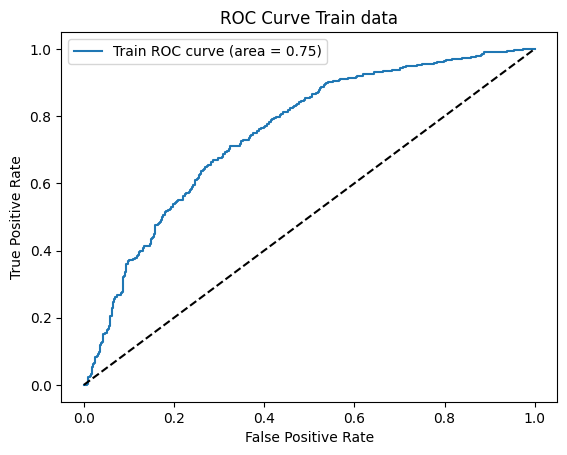

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities
Y_train_pred_proba = result.predict(X_train_sm)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(Y_train, Y_train_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label='Train ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Train data')
plt.legend(loc='best')
plt.show()


7. Obtain threshold to balance sensitivity and specificity

Go to step 8 only if you are satisfied with model on train data

In [ ]:

# Calculate the point where the difference between TPR and FPR is minimum
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

print('Optimal Threshold:', optimal_threshold)


Optimal Threshold: 0.6914779589049258


9.Use above threshold to obtain sensitivity and specificity for test data

(compare with step 7)

In [ ]:
from sklearn.metrics import confusion_matrix

# Classify predictions based on the optimal threshold
Y_train_pred_class = (Y_train_pred_proba >= optimal_threshold).astype(int)

# Calculate confusion matrix
conf_matrix = confusion_matrix(Y_train, Y_train_pred_class)
sensitivity = conf_matrix[1, 1] / (conf_matrix[1, 0] + conf_matrix[1, 1])
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])

print('Sensitivity:', sensitivity)
print('Specificity:', specificity)

Sensitivity: 0.710128055878929
Specificity: 0.6751918158567775


In [ ]:
# Print the classification report
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report

class_report = classification_report(Y_train, Y_train_pred_class)
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.51      0.68      0.58       391
         1.0       0.83      0.71      0.76       859

    accuracy                           0.70      1250
   macro avg       0.67      0.69      0.67      1250
weighted avg       0.73      0.70      0.71      1250



8.Obtain ROC curve and AUC for test data (compare with step 6)

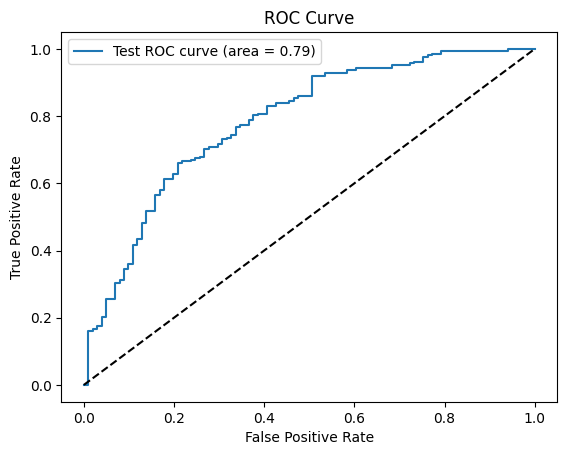

In [ ]:
X_test_sm = sm.add_constant(X_test)

# Predict probabilities
Y_test_pred_proba = result.predict(X_test_sm)

# Calculate ROC curve
fpr_test, tpr_test, thresholds_test = roc_curve(Y_test, Y_test_pred_proba)
roc_auc_test = auc(fpr_test, tpr_test)

# Plot ROC curve
plt.figure()
plt.plot(fpr_test, tpr_test, label='Test ROC curve (area = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix

# Classify predictions based on the optimal threshold
Y_test_pred_class = (Y_test_pred_proba >= optimal_threshold).astype(int)

# Calculate confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_test_pred_class)
sensitivity = conf_matrix[1, 1] / (conf_matrix[1, 0] + conf_matrix[1, 1])
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])

print('Sensitivity:', sensitivity)
print('Specificity:', specificity)


Sensitivity: 0.7169811320754716
Specificity: 0.693069306930693


In [ ]:
# Print the classification report for test data


class_report = classification_report(Y_test, Y_test_pred_class)
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.54      0.69      0.61       101
         1.0       0.83      0.72      0.77       212

    accuracy                           0.71       313
   macro avg       0.68      0.71      0.69       313
weighted avg       0.74      0.71      0.72       313



Comment:

The results for train and test data are quite close  i.e

ROC for train = 0.79 with accuracy of 74%

&

for test =0.78. and with accuracy of 72%

Model using only significant features & VIX

In [ ]:
# Define the features (model)and target
model2 = ['dax_return', 'hangseng_return', 'vix_return']
x = df[model2]
y = df['Nifty_Dir_Open']

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# Add a constant to the independent variables
x_train_sm = sm.add_constant(x_train)

# Fit the logistic regression model
logit_model = sm.Logit(y_train, x_train_sm)
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.561198
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:         Nifty_Dir_Open   No. Observations:                 1250
Model:                          Logit   Df Residuals:                     1246
Method:                           MLE   Df Model:                            3
Date:                Thu, 04 Jul 2024   Pseudo R-squ.:                 0.09677
Time:                        10:35:34   Log-Likelihood:                -701.50
converged:                       True   LL-Null:                       -776.65
Covariance Type:            nonrobust   LLR p-value:                 2.258e-32
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.8951      0.066     13.478      0.000       0.765       1.025
dax_return    

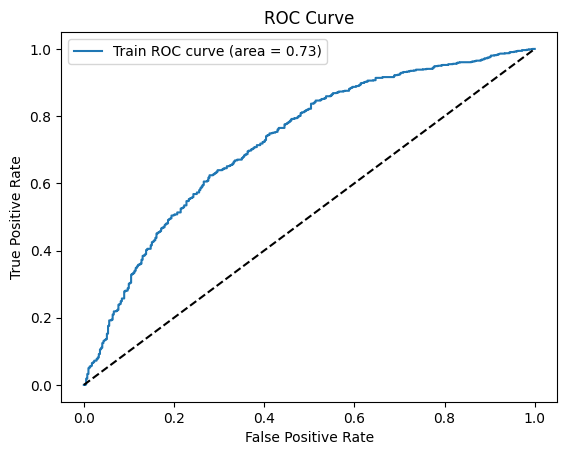

In [ ]:
# Predict probabilities
y_train_pred_proba = result.predict(x_train_sm)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_train, y_train_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label='Train ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

In [ ]:
# Classify predictions based on the optimal threshold
y_train_pred_class = (y_train_pred_proba >= optimal_threshold).astype(int)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_train, y_train_pred_class)
sensitivity = conf_matrix[1, 1] / (conf_matrix[1, 0] + conf_matrix[1, 1])
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])

print('Sensitivity:', sensitivity)
print('Specificity:', specificity)

Sensitivity: 0.6903376018626309
Specificity: 0.6368286445012787


In [ ]:
class_report = classification_report(y_train, y_train_pred_class)
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.48      0.64      0.55       391
         1.0       0.81      0.69      0.74       859

    accuracy                           0.67      1250
   macro avg       0.65      0.66      0.65      1250
weighted avg       0.71      0.67      0.68      1250



TEST DATA

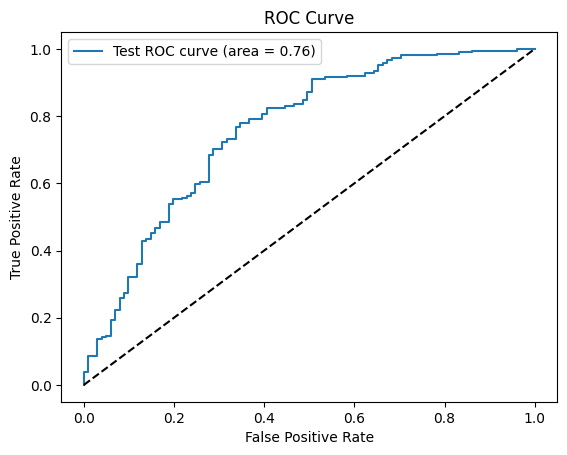

In [ ]:
x_test_sm = sm.add_constant(x_test)

# Predict probabilities
y_test_pred_proba = result.predict(x_test_sm)

# Calculate ROC curve
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_pred_proba)
roc_auc_test = auc(fpr_test, tpr_test)

# Plot ROC curve
plt.figure()
plt.plot(fpr_test, tpr_test, label='Test ROC curve (area = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()


In [ ]:
# Classify predictions based on the optimal threshold
y_test_pred_class = (y_test_pred_proba >= optimal_threshold).astype(int)

# Calculate confusion matrix
conf_matrix = confusion_matrix(Y_test, y_test_pred_class)
sensitivity = conf_matrix[1, 1] / (conf_matrix[1, 0] + conf_matrix[1, 1])
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])

print('Sensitivity:', sensitivity)
print('Specificity:', specificity)

Sensitivity: 0.7122641509433962
Specificity: 0.6831683168316832


In [ ]:
# Print the classification report for test data


class_report = classification_report(y_test, y_test_pred_class)
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.53      0.68      0.60       101
         1.0       0.83      0.71      0.76       212

    accuracy                           0.70       313
   macro avg       0.68      0.70      0.68       313
weighted avg       0.73      0.70      0.71       313



Comment:

The model with only sigfincant variables performs well i.e the ROC value remains the same 79% however the accuracyies differ slightly: 72% for training data and 73 % for testing data


Summary

There is a slight improvement in the model when only the significant variables
are used

**Phase 4**

This about using ML methods and compare with Binary Logistic Regression

1. Create data partition into train and test data sets ( 80/20)

(already done for Logistic Regression)

2. Apply Naïve Bayes Method on train data with Nifty Direction as dependent variable and previous day global market returns (and VIX) as independent variables.

3. Obtain ROC curve and AUC for train data

4. Obtain Confusion Matrix for train data

5. Obtain ROC curve and AUC for test data

6. Obtain Confusion Matrix for test data

7. Repeat steps 2 to 6 for Decision Tree

8. Repeat steps 2 to 6 for Random Forest Method

9. Compare AUC for test data in case of 4/5 methods and finalize the method

**Phase 5**

This about text mining/sentiment analysis

1. Use the twitter(X) data about Nifty50

2. Perform text pre-processing

3. Obtain Word-Cloud

4. Perform Sentiment Analysis

5. Visualize sentiment scores

# **PHASE 4**

# 2. Naïve Bayes Method

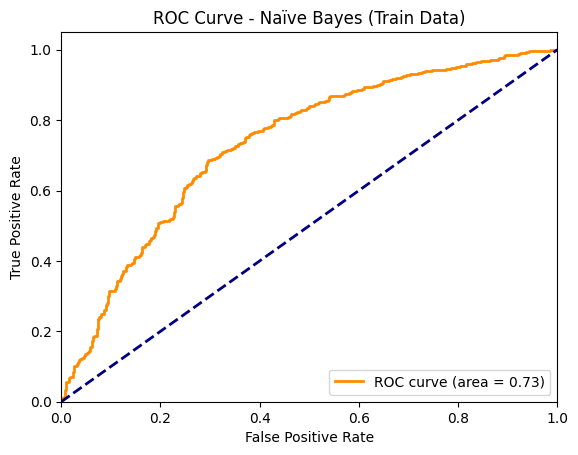

Confusion Matrix - Naïve Bayes (Train Data):
[[165 226]
 [107 752]]


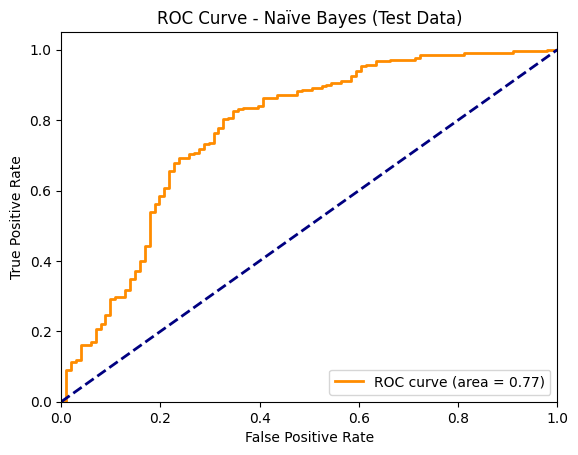

Confusion Matrix - Naïve Bayes (Test Data):
[[ 45  56]
 [ 20 192]]


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Train Naïve Bayes Model
nb_model = GaussianNB()
nb_model.fit(X_train, Y_train)

# Predictions on train data
y_train_pred = nb_model.predict(X_train)
y_train_prob = nb_model.predict_proba(X_train)[:, 1]

# ROC Curve and AUC for train data
fpr, tpr, _ = roc_curve(Y_train, y_train_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Naïve Bayes (Train Data)')
plt.legend(loc="lower right")
plt.show()

# Confusion Matrix for train data
conf_matrix_train = confusion_matrix(Y_train, y_train_pred)
print("Confusion Matrix - Naïve Bayes (Train Data):")
print(conf_matrix_train)

# Predictions on test data
y_test_pred = nb_model.predict(X_test)
y_test_prob_nb = nb_model.predict_proba(X_test)[:, 1]

# ROC Curve and AUC for test data
fpr, tpr, _ = roc_curve(Y_test, y_test_prob_nb)
nb_test_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % nb_test_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Naïve Bayes (Test Data)')
plt.legend(loc="lower right")
plt.show()

# Confusion Matrix for test data
conf_matrix_test = confusion_matrix(Y_test, y_test_pred)
print("Confusion Matrix - Naïve Bayes (Test Data):")
print(conf_matrix_test)

# Decision Tree

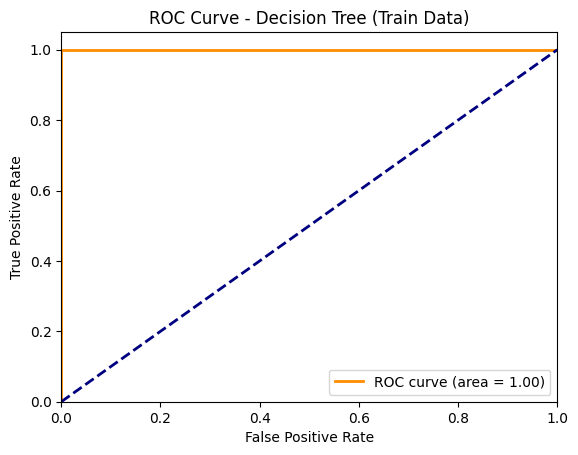

Confusion Matrix - Decision Tree (Train Data):
[[391   0]
 [  0 859]]


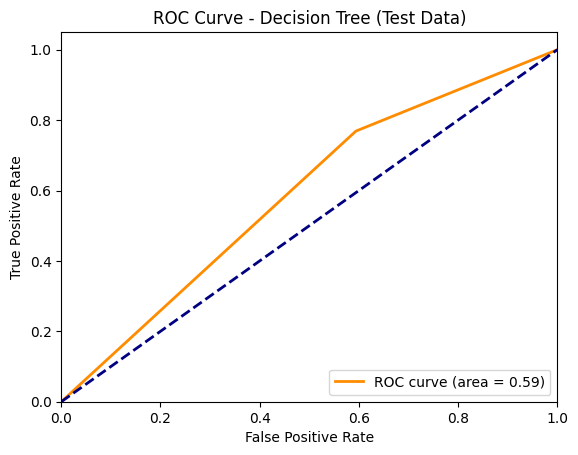

Confusion Matrix - Decision Tree (Test Data):
[[ 41  60]
 [ 49 163]]


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree Model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, Y_train)

# Predictions on train data
y_train_pred = dt_model.predict(X_train)
y_train_prob = dt_model.predict_proba(X_train)[:, 1]

# ROC Curve and AUC for train data
fpr, tpr, _ = roc_curve(Y_train, y_train_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree (Train Data)')
plt.legend(loc="lower right")
plt.show()

# Confusion Matrix for train data
conf_matrix_train = confusion_matrix(Y_train, y_train_pred)
print("Confusion Matrix - Decision Tree (Train Data):")
print(conf_matrix_train)

# Predictions on test data
y_test_pred = dt_model.predict(X_test)
y_test_prob_dt = dt_model.predict_proba(X_test)[:, 1]

# ROC Curve and AUC for test data
fpr, tpr, _ = roc_curve(Y_test, y_test_prob_dt)
dt_test_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % dt_test_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree (Test Data)')
plt.legend(loc="lower right")
plt.show()

# Confusion Matrix for test data
conf_matrix_test = confusion_matrix(Y_test, y_test_pred)
print("Confusion Matrix - Decision Tree (Test Data):")
print(conf_matrix_test)


# Random forest


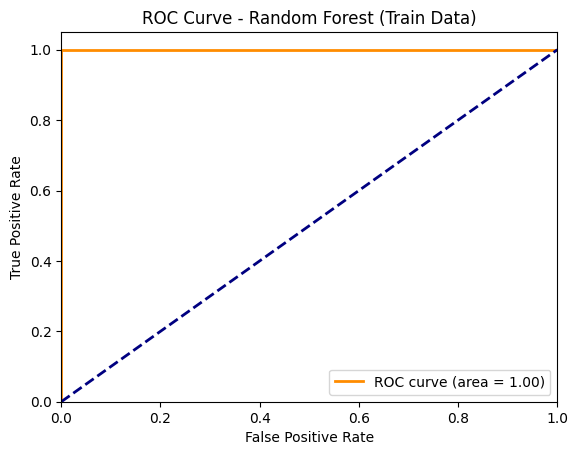

Confusion Matrix - Random Forest (Train Data):
[[391   0]
 [  0 859]]


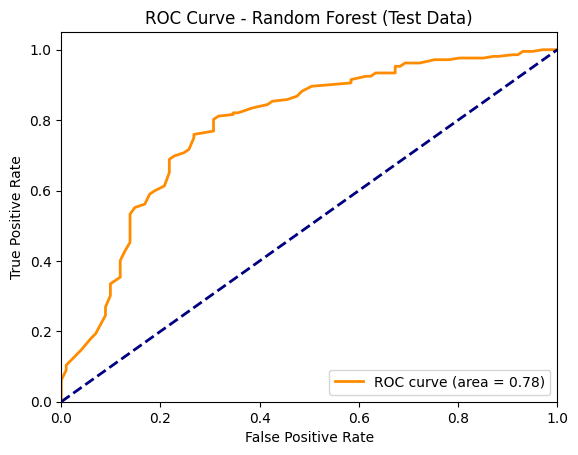

Confusion Matrix - Random Forest (Test Data):
[[ 46  55]
 [ 21 191]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest Model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, Y_train)

# Predictions on train data
y_train_pred = rf_model.predict(X_train)
y_train_prob = rf_model.predict_proba(X_train)[:, 1]

# ROC Curve and AUC for train data
fpr, tpr, _ = roc_curve(Y_train, y_train_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest (Train Data)')
plt.legend(loc="lower right")
plt.show()

# Confusion Matrix for train data
conf_matrix_train = confusion_matrix(Y_train, y_train_pred)
print("Confusion Matrix - Random Forest (Train Data):")
print(conf_matrix_train)

# Predictions on test data
y_test_pred = rf_model.predict(X_test)
y_test_prob_rf = rf_model.predict_proba(X_test)[:, 1]

# ROC Curve and AUC for test data
fpr, tpr, _ = roc_curve(Y_test, y_test_prob_rf)
rf_test_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % rf_test_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest (Test Data)')
plt.legend(loc="lower right")
plt.show()

# Confusion Matrix for test data
conf_matrix_test = confusion_matrix(Y_test, y_test_pred)
print("Confusion Matrix - Random Forest (Test Data):")
print(conf_matrix_test)


# SVM


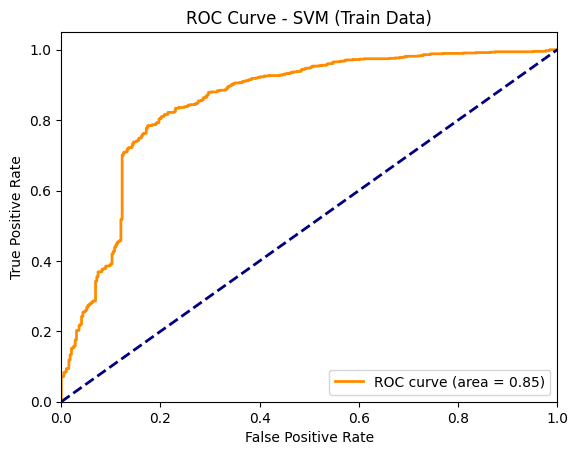

Confusion Matrix - SVM (Train Data):
[[163 228]
 [ 25 834]]


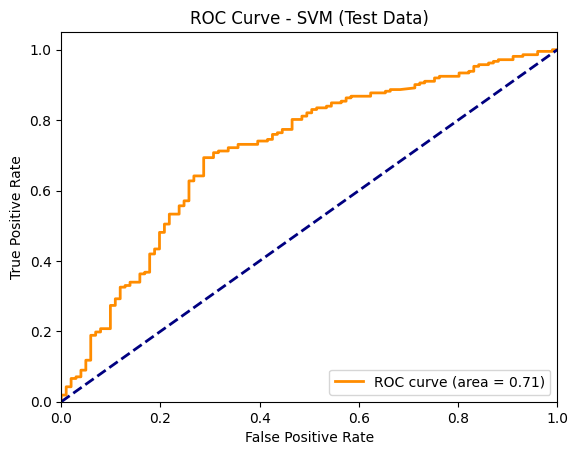

Confusion Matrix - SVM (Test Data):
[[ 27  74]
 [ 19 193]]


In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled data back to DataFrame to keep feature names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=model1, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=model1, index=X_test.index)

# Train SVM Model
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train_scaled, Y_train)

# Predictions on train data
y_train_pred = svm_model.predict(X_train_scaled)
y_train_prob = svm_model.predict_proba(X_train_scaled)[:, 1]


# ROC Curve and AUC for train data
fpr, tpr, _ = roc_curve(Y_train, y_train_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM (Train Data)')
plt.legend(loc="lower right")
plt.show()

# Confusion Matrix for train data
conf_matrix_train = confusion_matrix(Y_train, y_train_pred)
print("Confusion Matrix - SVM (Train Data):")
print(conf_matrix_train)

# Predictions on test data
y_test_pred = svm_model.predict(X_test)
y_test_prob_svm = svm_model.predict_proba(X_test)[:, 1]

# ROC Curve and AUC for test data
fpr, tpr, _ = roc_curve(Y_test, y_test_prob_svm)
svm_test_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % svm_test_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM (Test Data)')
plt.legend(loc="lower right")
plt.show()

# Confusion Matrix for test data
conf_matrix_test = confusion_matrix(Y_test, y_test_pred)
print("Confusion Matrix - SVM (Test Data):")
print(conf_matrix_test)


# Neural Network

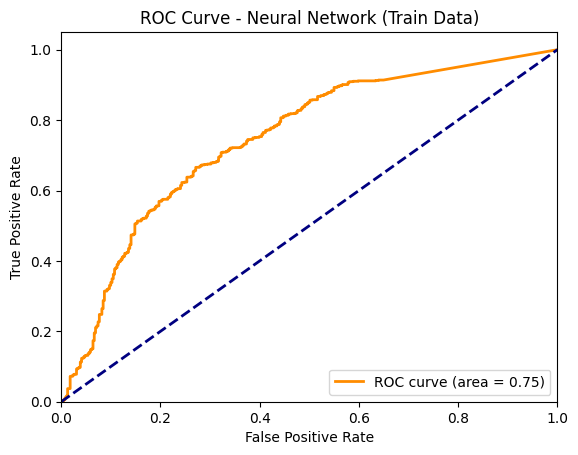

Confusion Matrix - Neural Network (Train Data):
[[164 227]
 [ 79 780]]


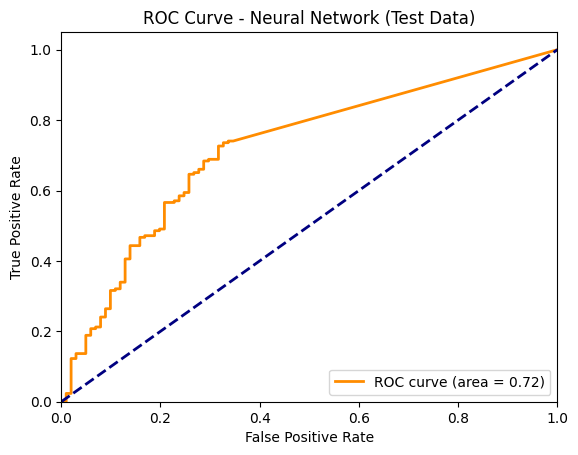

Confusion Matrix - Neural Network (Test Data):
[[ 67  34]
 [ 55 157]]


In [ ]:
from sklearn.neural_network import MLPClassifier

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled data back to DataFrame to keep feature names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=model1, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=model1, index=X_test.index)

# Train Neural Network Model
nn_model = MLPClassifier(hidden_layer_sizes=(1),random_state=42, max_iter=1000)
nn_model.fit(X_train_scaled, Y_train)

# Predictions on train data
y_train_pred = nn_model.predict(X_train_scaled)
y_train_prob = nn_model.predict_proba(X_train_scaled)[:, 1]

# ROC Curve and AUC for train data
fpr, tpr, _ = roc_curve(Y_train, y_train_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Neural Network (Train Data)')
plt.legend(loc="lower right")
plt.show()

# Confusion Matrix for train data
conf_matrix_train = confusion_matrix(Y_train, y_train_pred)
print("Confusion Matrix - Neural Network (Train Data):")
print(conf_matrix_train)

# Predictions on test data
y_test_pred = nn_model.predict(X_test)
y_test_prob_nn = nn_model.predict_proba(X_test)[:, 1]

# ROC Curve and AUC for test data
fpr, tpr, _ = roc_curve(Y_test, y_test_prob_nn)
nn_test_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % nn_test_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Neural Network (Test Data)')
plt.legend(loc="lower right")
plt.show()

# Confusion Matrix for test data
conf_matrix_test = confusion_matrix(Y_test, y_test_pred)
print("Confusion Matrix - Neural Network (Test Data):")
print(conf_matrix_test)


# Compare models

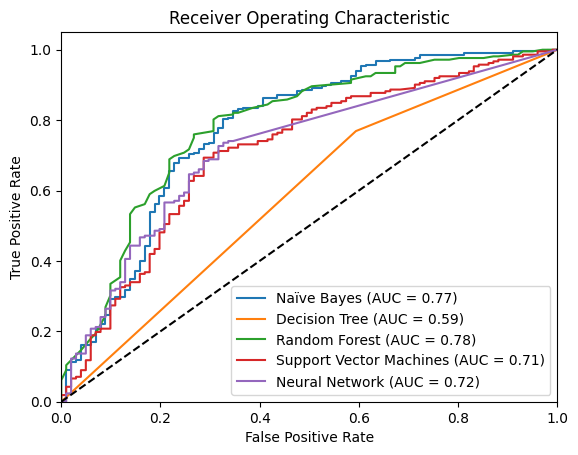

In [ ]:
models_predictions = [
    ('Naïve Bayes',Y_test, y_test_prob_nb),
    ('Decision Tree',Y_test,  y_test_prob_dt),
    ('Random Forest',Y_test,y_test_prob_rf),
    ('Support Vector Machines',Y_test,y_test_prob_svm),
    ('Neural Network',Y_test,y_test_prob_nn)
]
plt.figure()

for model_name, true_labels, predicted_probs in models_predictions:
    fpr, tpr, _ = roc_curve(true_labels, predicted_probs)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [ ]:
lr_test_auc = 0.79 # From Phase-3 assignment
auc_scores = {
    'Logistic Regression': lr_test_auc,
    'Naïve Bayes': nb_test_auc,
    'Decision Tree': dt_test_auc,
    'Random Forest': rf_test_auc,
    'SVM': svm_test_auc,
    'Neural Network': nn_test_auc
}

# Print the AUC scores
for method, auc_score in auc_scores.items():
    print(f'{method} AUC: {auc_score:.2f}')

# Identify the best method based on AUC
best_method = max(auc_scores, key=auc_scores.get)
print(f'The best method based on AUC is: {best_method}')


Logistic Regression AUC: 0.79
Naïve Bayes AUC: 0.77
Decision Tree AUC: 0.59
Random Forest AUC: 0.78
SVM AUC: 0.71
Neural Network AUC: 0.72
The best method based on AUC is: Logistic Regression
